In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error

## Importing Data

In [2]:
df = pd.read_csv("C://Users/osmon/Documents/Heart Project/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Explaining the Variables

##### age
##### sex
##### chest pain type (4 values)
##### resting blood pressure
##### serum cholestoral in mg/dl
##### fasting blood sugar > 120 mg/dl
##### resting electrocardiographic results (values 0,1,2)
##### maximum heart rate achieved
##### exercise induced angina
##### oldpeak = ST depression induced by exercise relative to rest
##### the slope of the peak exercise ST segment
##### number of major vessels (0-3) colored by flourosopy
##### thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
##### target - have disease or not (1=yes, 0=no)

# Data Visualization

### From The Variables, one of the most important to pay attention to would be the 'Target' as it indicates whether or not there is a presence of heart disease

The counts of the Target variable: 1    165
0    138
Name: target, dtype: int64


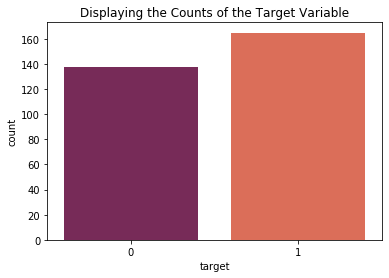

In [4]:
## Obtaining a count for the "Target" variable and visualizing the numbers of heart disease vs without heart disease

print('The counts of the Target variable:', df.target.value_counts())

sns.countplot(x="target", data=df, palette="rocket")
plt.title('Displaying the Counts of the Target Variable')
plt.show()

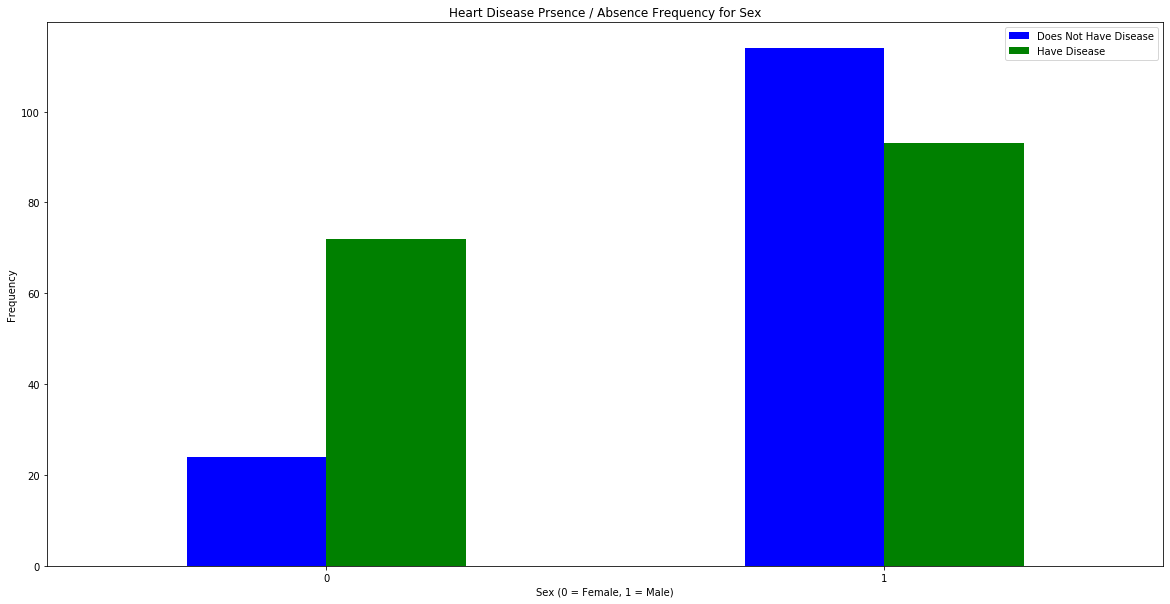

In [5]:
##Displaying the frequency distribution for presence/absence of heart disease for Sex
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(20,10),color=['blue','green' ])
plt.title('Heart Disease Prsence / Absence Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Does Not Have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

## There is a wide range of ages here, so let us see how heart disease vs no heart disease frequency is distributed across the ages

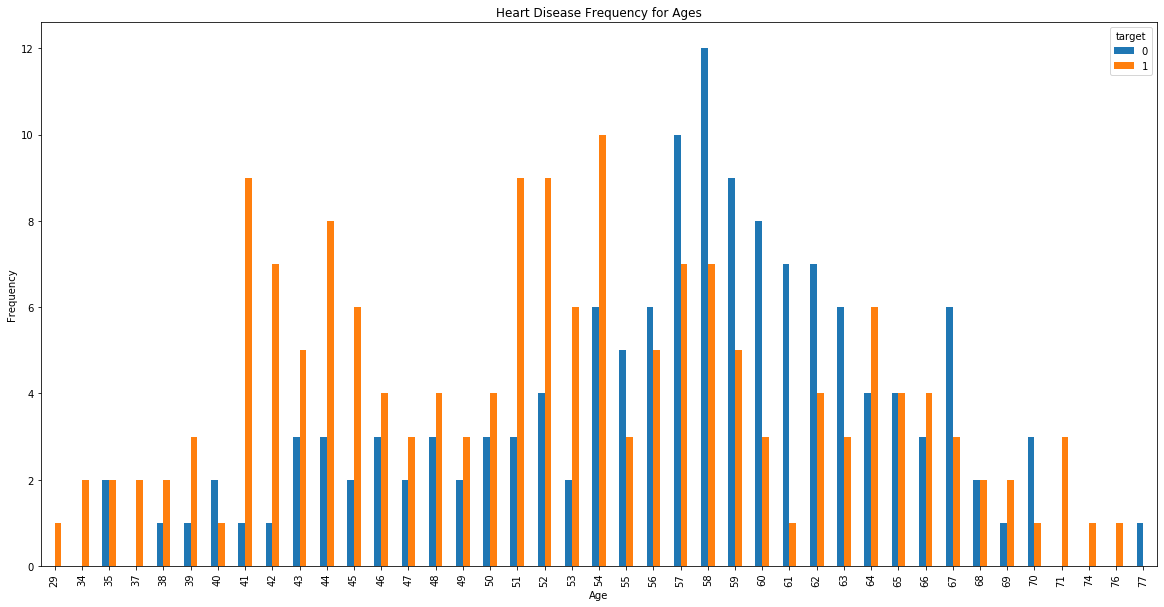

In [6]:
##Plotting the frequency against the Age variable
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,10))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Exploring other variables

In [7]:
#### The chest pain variable has different values
## Value 1: typical angina
## Value 2: atypical angina 
## Value 3: non-anginal pain 
## Value 4: asymptomatic)

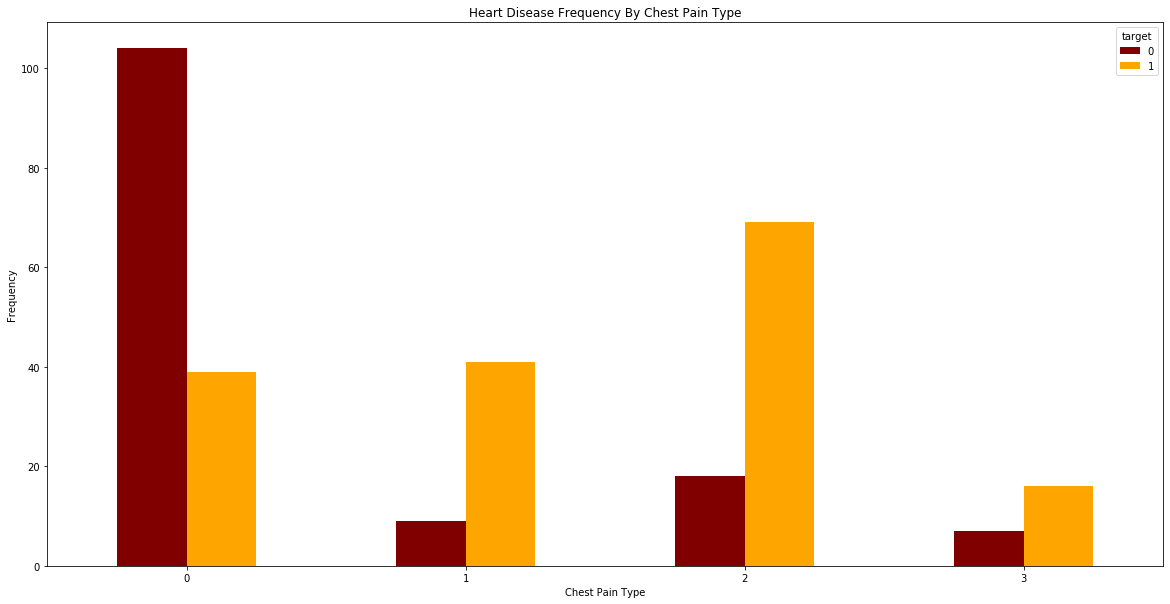

In [8]:
##Plotting Heart Disease Frequency according to the different chest pain types
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(20,10),color=['maroon','orange' ])
plt.title('Heart Disease Frequency By Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

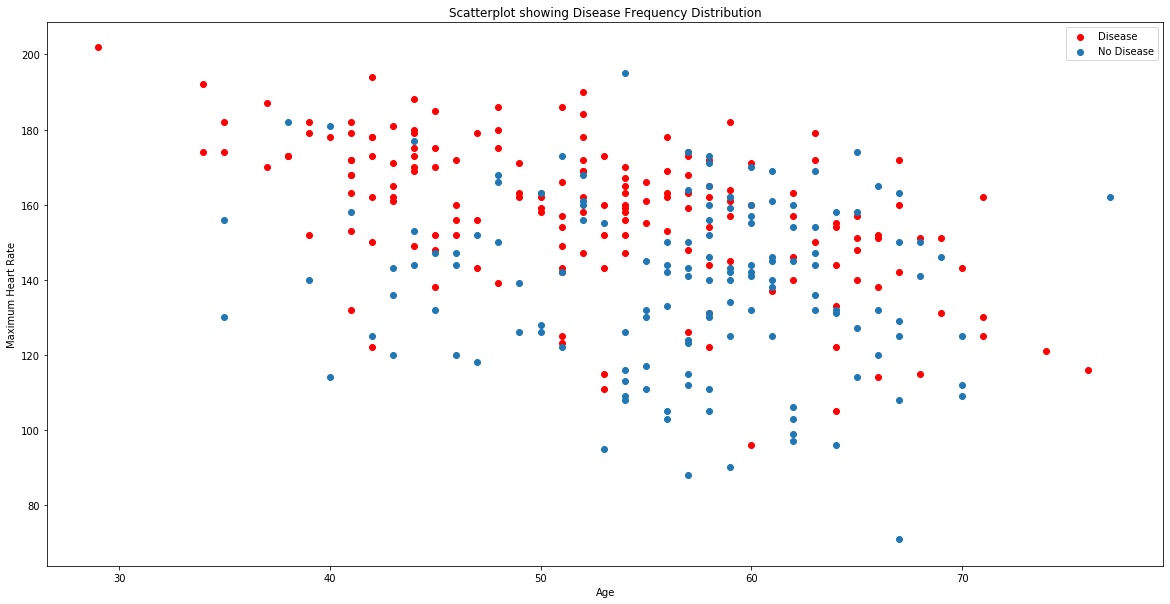

In [9]:
##Plotting the scatterplot for the disease distribution against the various ages
plt.figure(figsize=(20,10))
plt.title("Scatterplot showing Disease Frequency Distribution")
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

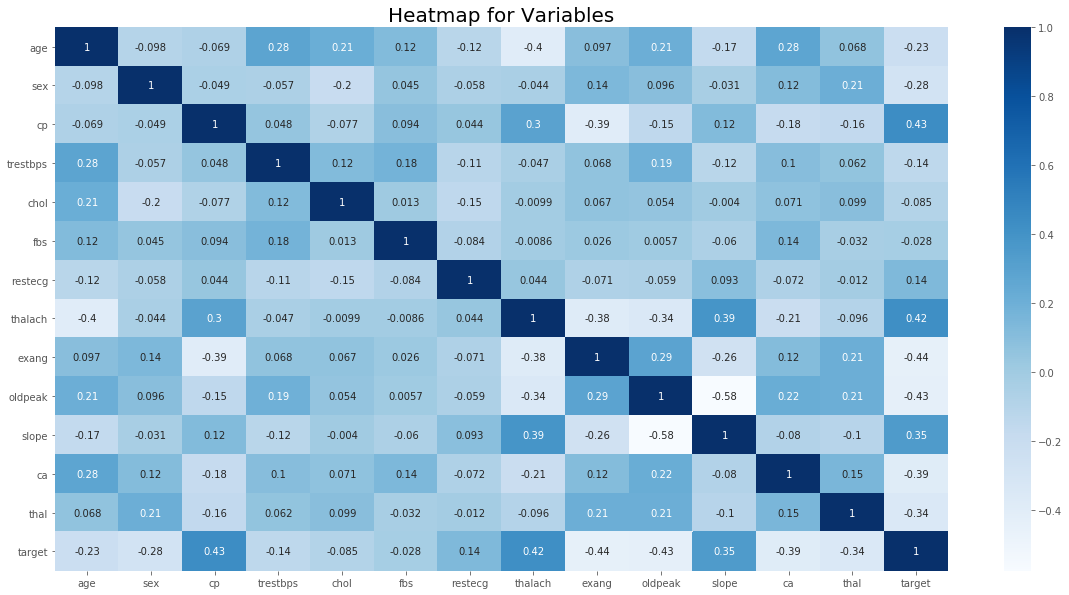

In [10]:
## Plotting heatmap of our variables to show correlation

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.title('Heatmap for Variables', fontsize = 20)
plt.show()

##### Exploring the FBS(Fasting Blood Sugar) Variable

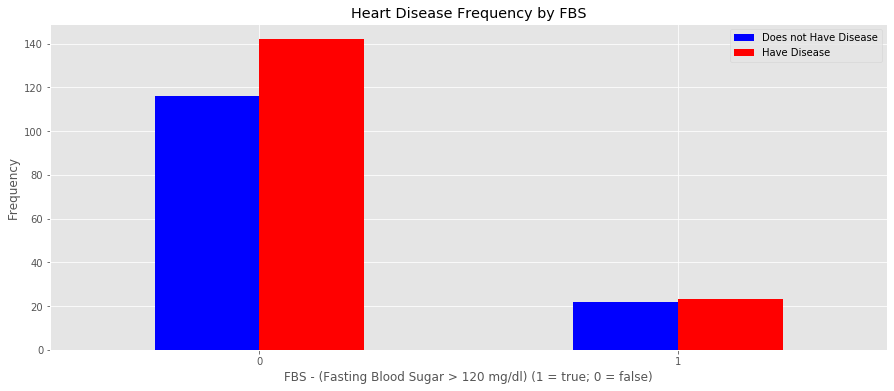

In [11]:
## Plotting the heart disease distrubution by the FBS
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['blue','red' ])
plt.title('Heart Disease Frequency by FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Does not Have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

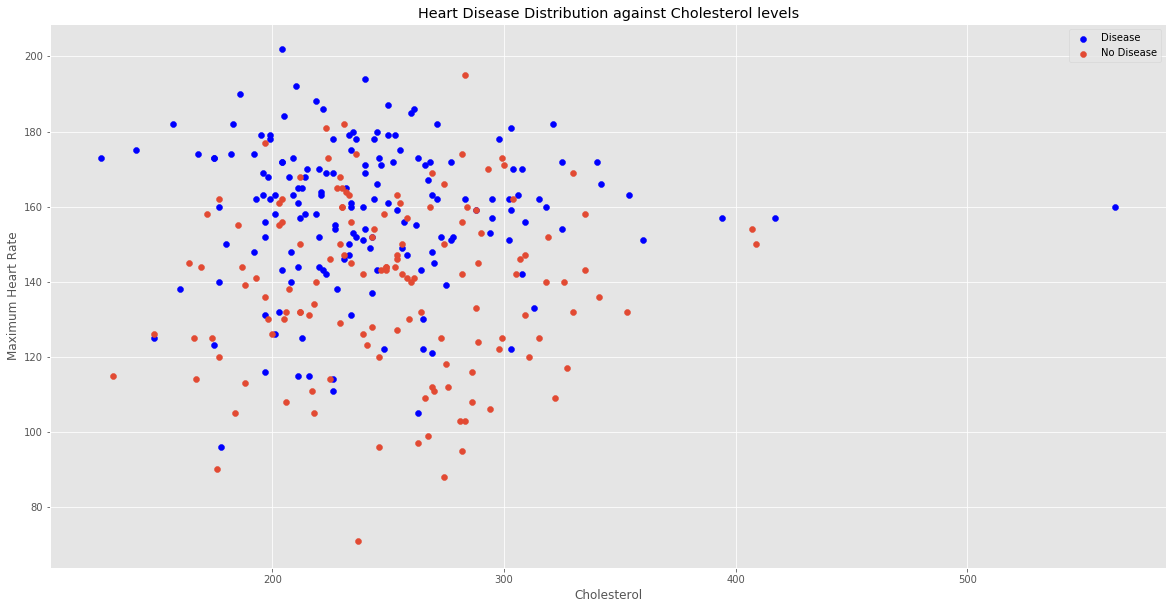

In [12]:
##Plotting the scatterplot for the disease distribution against the various Cholesterol levels
plt.figure(figsize=(20,10))
plt.title("Heart Disease Distribution against Cholesterol levels")
plt.scatter(x=df.chol[df.target==1], y=df.thalach[(df.target==1)], c="blue")
plt.scatter(x=df.chol[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Cholesterol")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
scatters = df.drop(['trestbps','chol','thalach','target'], axis=1).columns

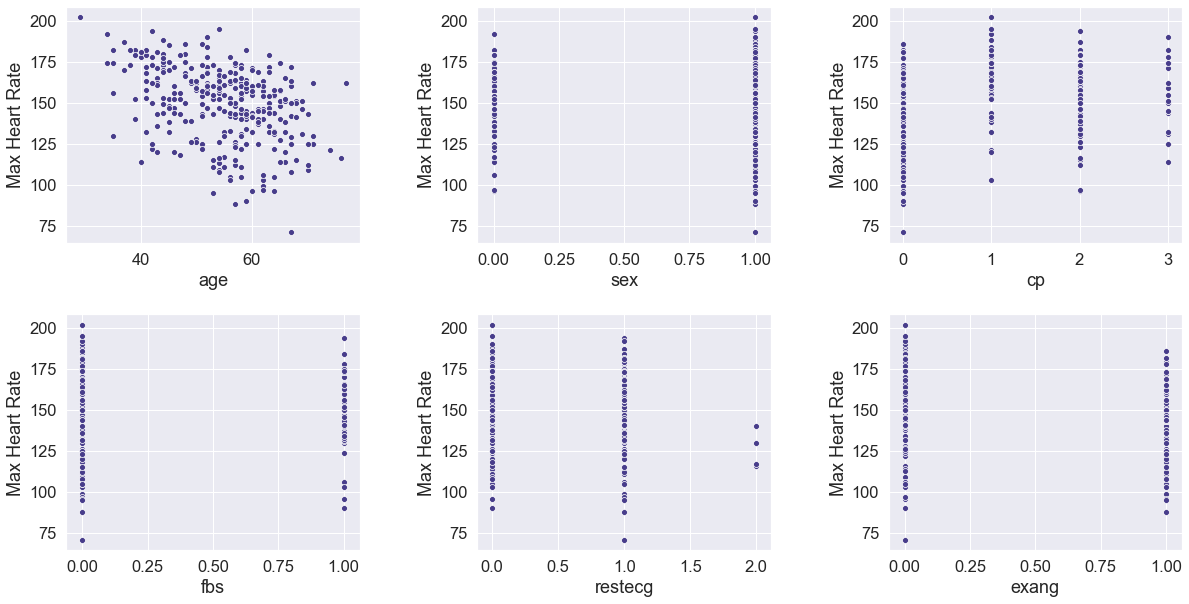

In [15]:
sns.set(font_scale=1.5)
#plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.4)
sns.set_style(style='whitegrid')
for var, ax in zip(scatters, axes.flatten()):
    sns.scatterplot(x=var, y='thalach', data=df, ax=ax, color='darkslateblue')
    ax.set(ylabel='Max Heart Rate')

In [16]:
## The above plot did not show the desired outcome I had imagined, so I decided to take aa closer look at the plot using target as the hue

In [17]:
closer = ['age','cp']

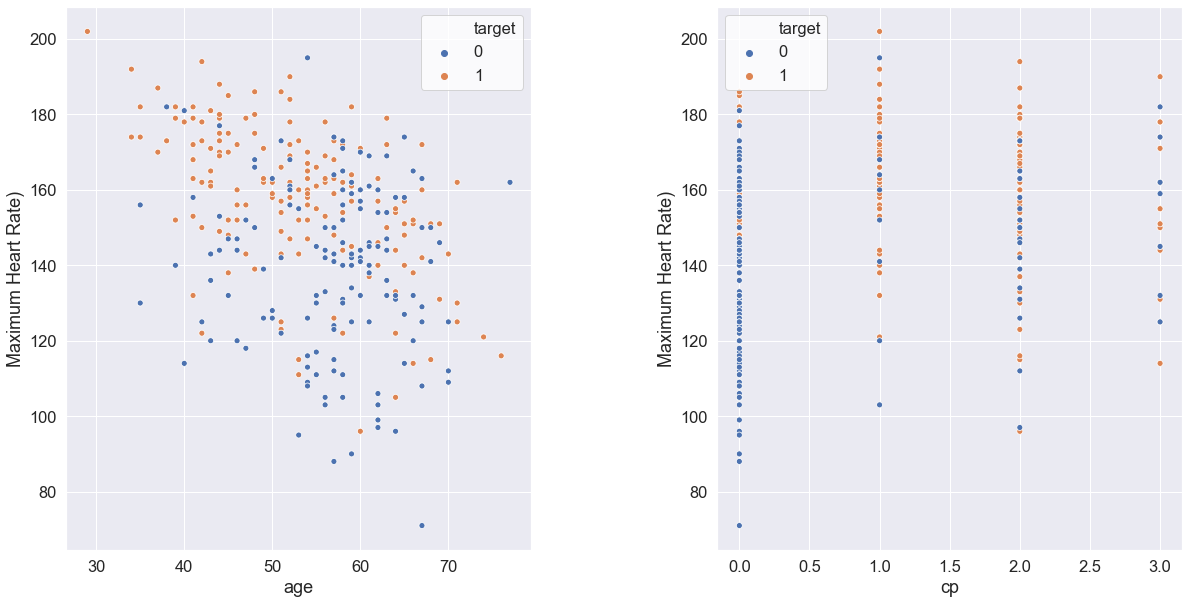

In [18]:
sns.set(font_scale=1.5)
#plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
fig.subplots_adjust(hspace=0.2, wspace=0.4)
sns.set_style(style='whitegrid')
for var, ax in zip(closer, axes.flatten()):
    sns.scatterplot(x=var, y='thalach', hue = 'target', data=df, ax=ax)#, color='darkslateblue')
    ax.set(ylabel='Maximum Heart Rate)')

#### Further Examining the Chest Pain variable

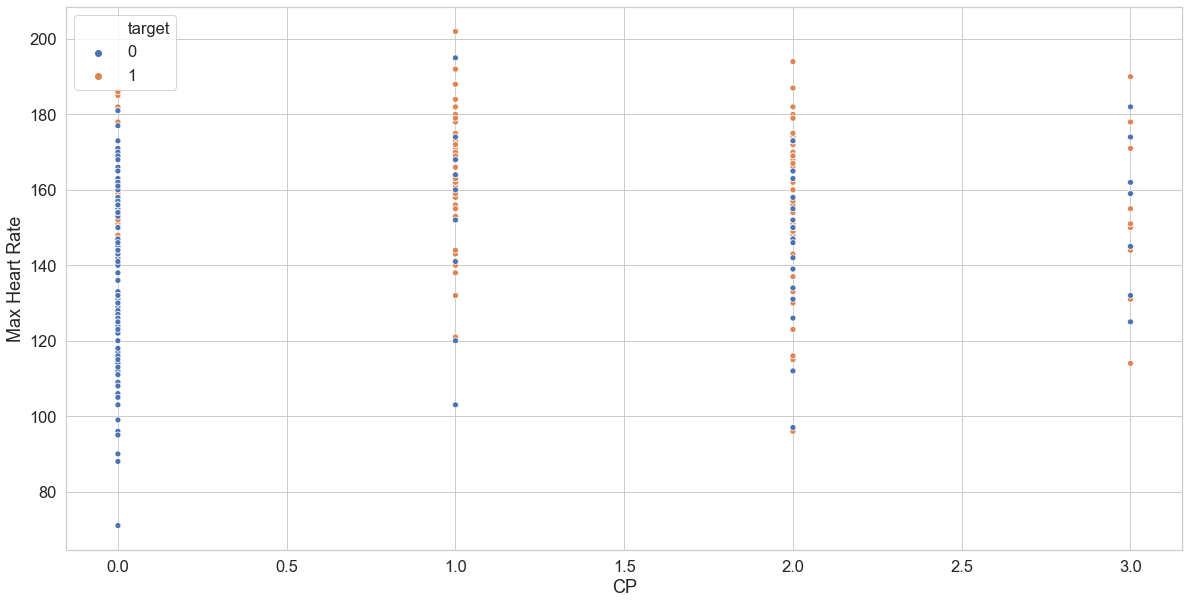

In [19]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,10))
sns.set_style(style='whitegrid')
ax = sns.scatterplot(x='cp', y='thalach', hue = 'target', data=df)
ax.set(xlabel='CP', ylabel='Max Heart Rate')
plt.show()

## Building Logistic Regression Models

In [20]:
#preparing the data
y = df.target.values
x_data = df.drop(['target'], axis = 1)
print("Shape of y:", y.shape)

Shape of y: (303,)


In [21]:
#normalizing the data 
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [22]:
#splitting the data into dependent and independent variables 
#split to that 80% of our data is trainijg data and 20% is test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [23]:
#transposing matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()

In [25]:
test_accuracy = {}

logreg = LogisticRegression()
logreg.fit(x_train.T,y_train.T)
acc = logreg.score(x_test.T,y_test.T)*100

test_accuracy['Logistic Regression'] = acc
print("Logistic Regression Test Accuracy is: {:.2f}%".format(acc))

Logistic Regression Test Accuracy is: 83.61%


#### The Logistic Regression showed a score of 83.61

### Naive Bayes Classifier

In [26]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

#to get the metrics
acc = nb.score(x_test.T,y_test.T)*100
test_accuracy['Naive Bayes'] = acc
print("Naive Bayes Classifier Test Accuracy is: {:.2f}%".format(acc))

Naive Bayes Classifier Test Accuracy is: 85.25%


#### The Naive Bayes Classifier Test Accuracy is: 85.25%

### KNN Classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)  
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

knn_sc = (knn.score(x_test.T, y_test.T)*100)
print("The Accuracy of the KNN Classifier is: {:.2f}% ".format(knn_sc))

The Accuracy of the KNN Classifier is: 83.61% 


##### Optimizing K value to see best KNN result 

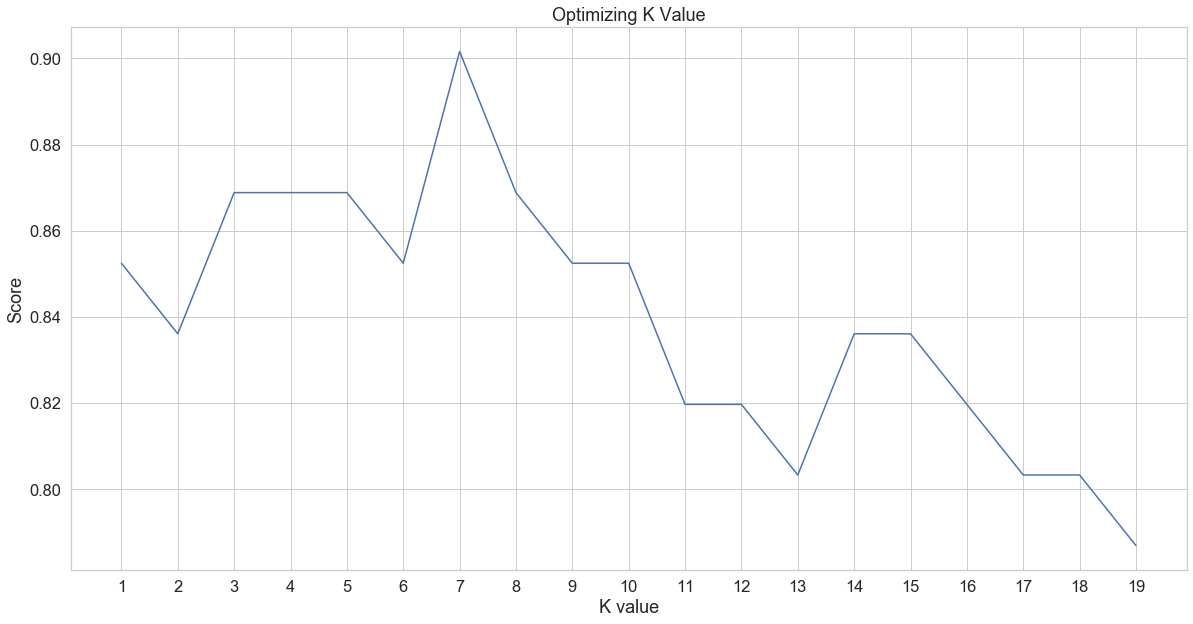

Optimal value of KNN Score is 90.16%


In [32]:
# optimizing k value
scores = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scores.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scores)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.title("Optimizing K Value")
plt.show()

acc = max(scores)*100
test_accuracy['KNN'] = acc
print("Optimal value of KNN Score is {:.2f}%".format(acc))

##### Point of Elbow seen at k = 7, making k=7 the Optimal value of k

In [33]:
# This is to split the data into train, validation, and test data
x_train, x_test, y_train, y_test = train_test_split(df.drop(['target','thalach'], axis=1),
                                                    df['target'],
                                                    train_size = 0.50,
                                                    random_state=11)
x_val, x_test, y_val, y_test = train_test_split(x_test, 
                                                  y_test, 
                                                  train_size=0.50, 
                                                  random_state=11)

Feature: age - Score: 0.116
Feature: sex - Score: 0.025
Feature: cp - Score: 0.123
Feature: trestbps - Score: 0.012
Feature: chol - Score: 0.098
Feature: fbs - Score: 0.0
Feature: restecg - Score: 0.018
Feature: exang - Score: 0.0
Feature: oldpeak - Score: 0.172
Feature: slope - Score: 0.008
Feature: ca - Score: 0.097
Feature: thal - Score: 0.332


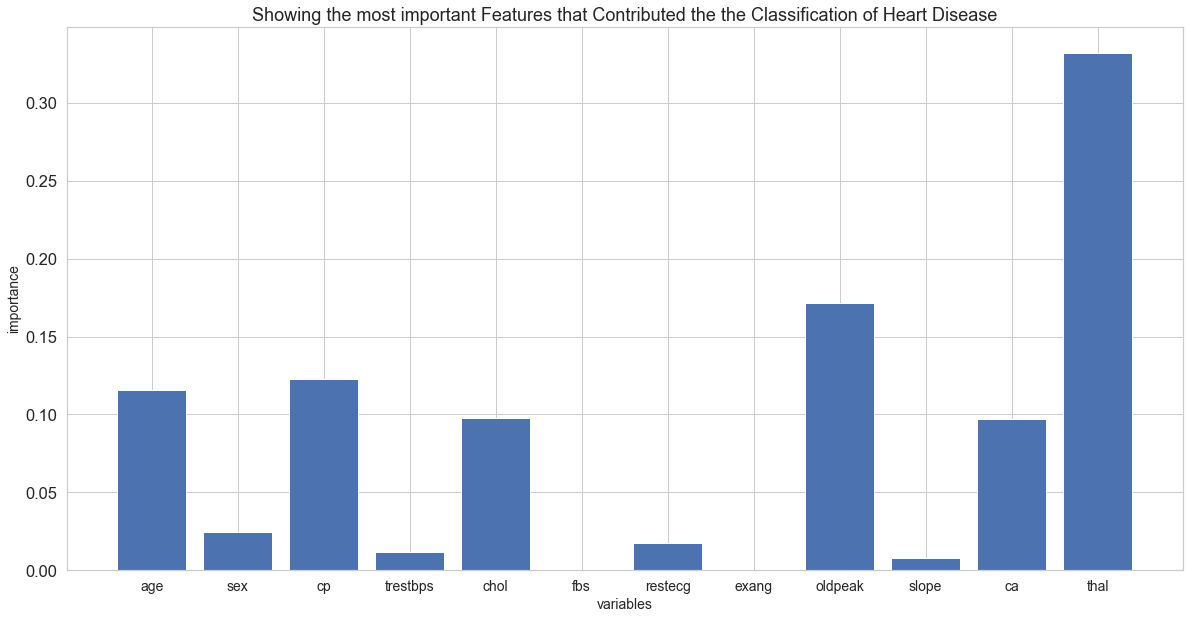

In [34]:
model = DecisionTreeRegressor()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {} - Score: {}'.format(x_train.columns[i],round(v,3)))
# plot feature importance
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20, 10))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks=np.arange(12), labels=x_train.columns, size=14)
plt.xlabel('variables', size=14)
plt.ylabel('importance', size=14)
plt.title('Showing the most important Features that Contributed the the Classification of Heart Disease')
plt.show()

##### It can be observed that cp, chol, oldpeak, ca, thal are the most important features


### After evalutaion the different models, we must now pick which model would be the most ideal for out data.
- This will be done using the accuracy Metric
- A bar chart will be used to illustrate and allow us to visualize how the accuracies measure up

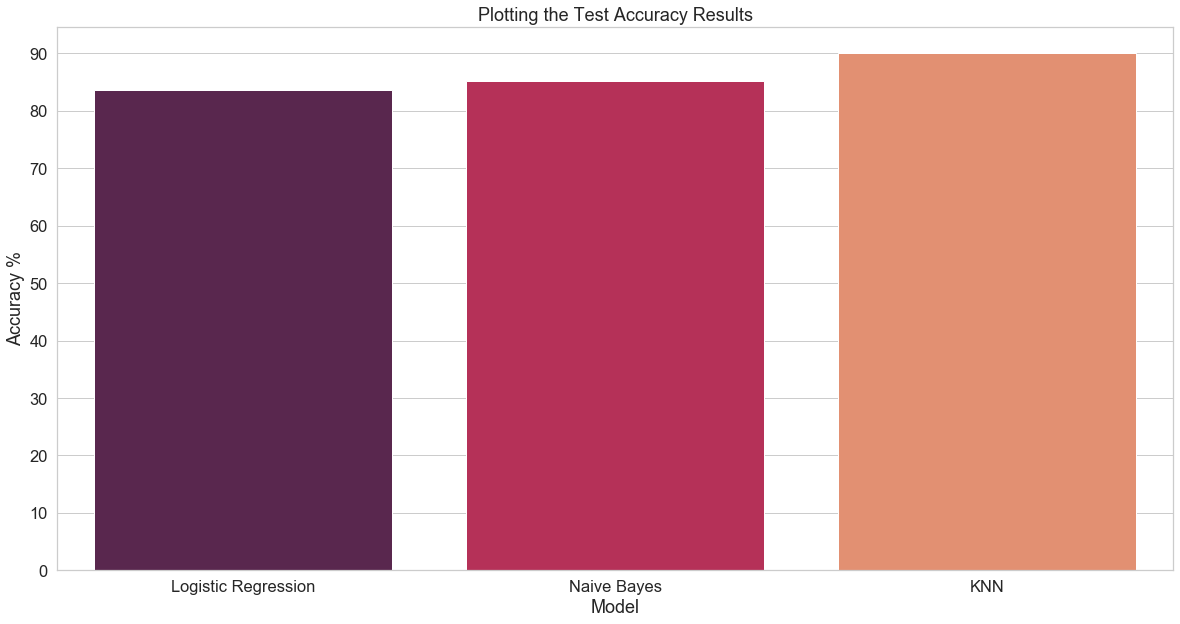

In [44]:
#plotting the test_accuracy set

sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Model")
sns.barplot(x=list(test_accuracy.keys()), y=list(test_accuracy.values()), palette='rocket')
plt.title("Plotting the Test Accuracy Results")
plt.show()

### It can be observed that the KNN Classifier would be the best model to use for our data